In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('/content/SingerAndSongs.csv')

In [24]:
df.head()

,Singer,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,Song name,speechiness,tempo,track_href,valence
0,Aastha Gill,0.48500,0.770,0.824,39ujbBjTwwqUFySaCYDMMT,0.000000,1,0.3180,-6.491,0,Proper Patola,0.0851,172.006,https://api.spotify.com/v1/tracks/39ujbBjTwwqU...,0.490
1,Aastha Gill,0.14300,0.825,0.666,5cjVsWqIkBQC7acTRhL0RO,0.000003,4,0.2370,-4.847,0,Kamariya,0.0554,96.987,https://api.spotify.com/v1/tracks/5cjVsWqIkBQC...,0.763
2,Aastha Gill,0.23600,0.663,0.551,3XYvdqcZrTmRntFDDbJkJd,0.000036,3,0.0923,-8.272,0,Buzz (feat. Badshah),0.1090,113.314,https://api.spotify.com/v1/tracks/3XYvdqcZrTmR...,0.601
3,Aastha Gill,0.00323,0.919,0.571,46GBoFCdFZZSjuGaZjZmGv,0.001680,5,0.1030,-7.175,0,Saara India,0.0687,105.007,https://api.spotify.com/v1/tracks/46GBoFCdFZZS...,0.231
4,Aastha Gill,0.12900,0.867,0.720,6VwVEIiCro1EMyh9B6Om3v,0.000000,9,0.2280,-5.188,0,Drunk n High,0.0619,104.974,https://api.spotify.com/v1/tracks/6VwVEIiCro1E...,0.755


In [25]:
df.shape

(2231, 15)

In [26]:
df.dtypes

Singer               object
acousticness        float64
danceability        float64
energy              float64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
Song name            object
speechiness         float64
tempo               float64
track_href           object
valence             float64
dtype: object

In [27]:
df.drop(['id', 'mode', 'track_href'], axis=1, inplace=True)

In [28]:
df.rename(columns={'Song name': 'song_name'}, inplace=True)

In [29]:
df.head()

,Singer,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,song_name,speechiness,tempo,valence
0,Aastha Gill,0.48500,0.770,0.824,0.000000,1,0.3180,-6.491,Proper Patola,0.0851,172.006,0.490
1,Aastha Gill,0.14300,0.825,0.666,0.000003,4,0.2370,-4.847,Kamariya,0.0554,96.987,0.763
2,Aastha Gill,0.23600,0.663,0.551,0.000036,3,0.0923,-8.272,Buzz (feat. Badshah),0.1090,113.314,0.601
3,Aastha Gill,0.00323,0.919,0.571,0.001680,5,0.1030,-7.175,Saara India,0.0687,105.007,0.231
4,Aastha Gill,0.12900,0.867,0.720,0.000000,9,0.2280,-5.188,Drunk n High,0.0619,104.974,0.755


In [30]:
top_singers = df['Singer'].value_counts().head(15)

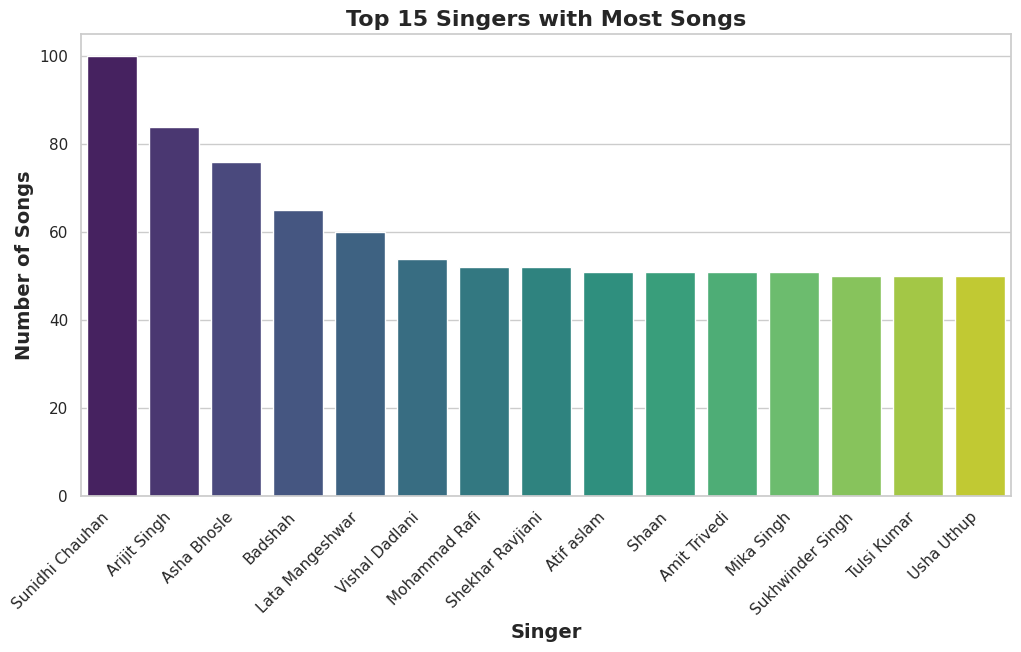

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=top_singers.index, y=top_singers.values, palette='viridis')

plt.title('Top 15 Singers with Most Songs', fontsize=16, fontweight='bold')
plt.xlabel('Singer', fontsize=14, fontweight='bold')
plt.ylabel('Number of Songs', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-32-42e78e71cd1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


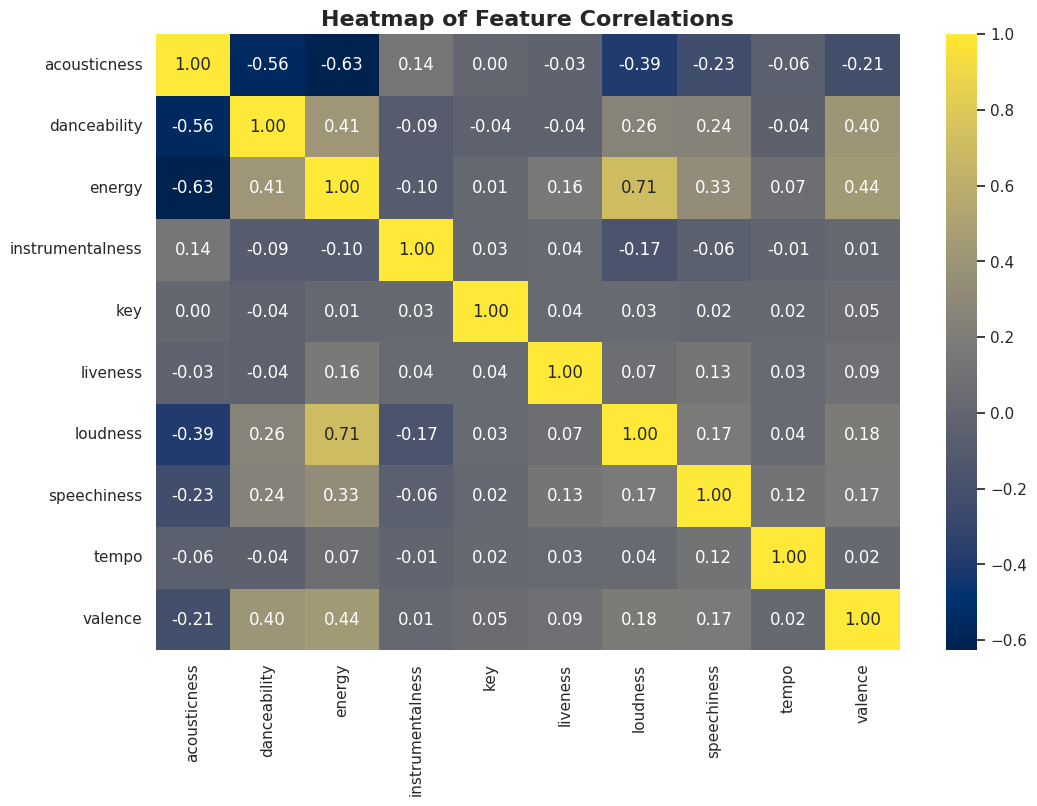

In [32]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")
plt.title('Heatmap of Feature Correlations', fontsize=16, fontweight='bold')
plt.show()

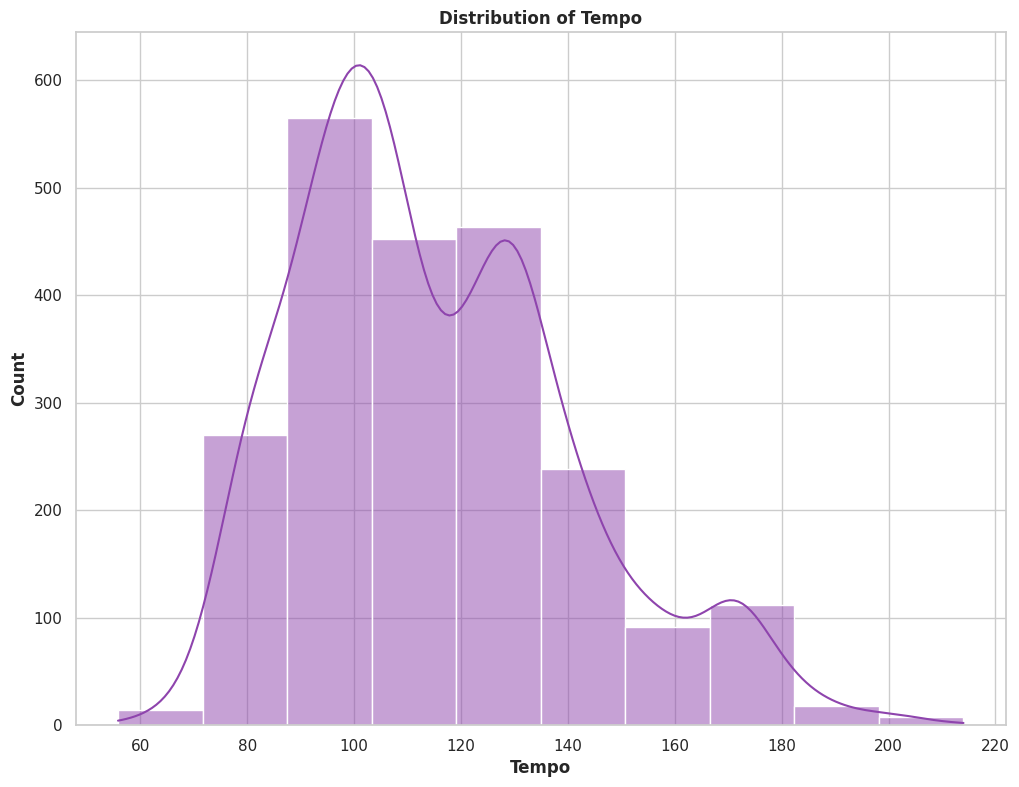

In [33]:
plt.figure(figsize=(12, 9))
ax = sns.histplot(df['tempo'], bins=10, kde=True, color='#8E44AD')

plt.title("Distribution of Tempo", fontweight='bold')
plt.xlabel("Tempo", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()


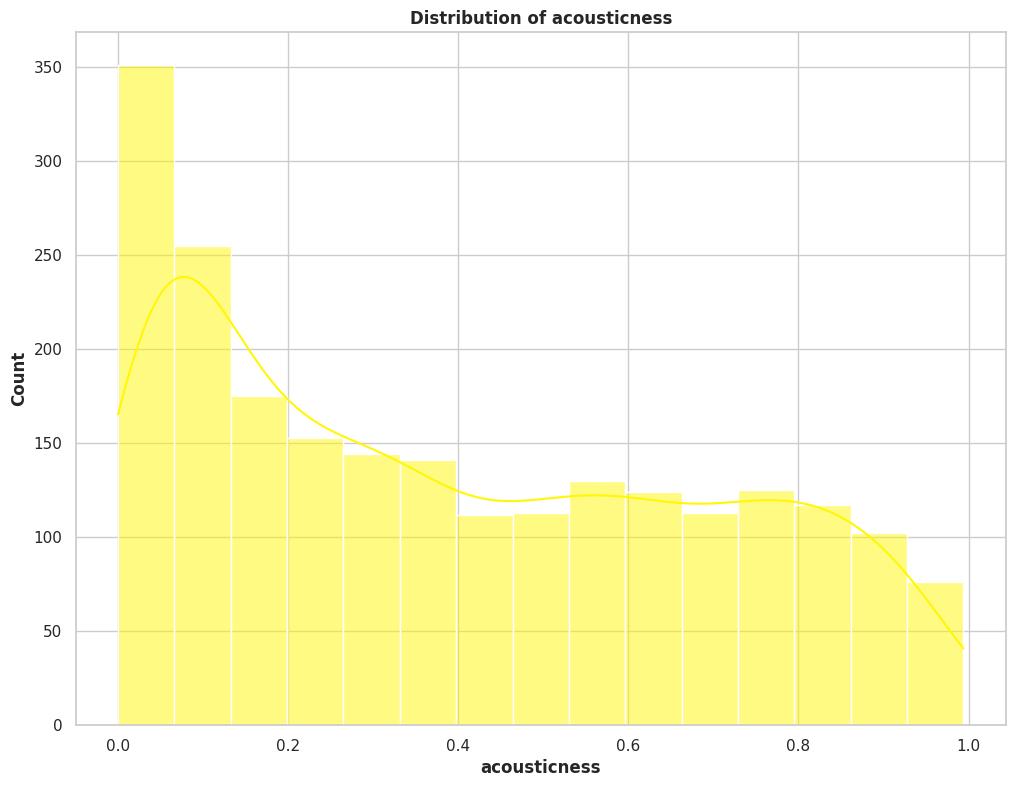

In [34]:
plt.figure(figsize=(12, 9))
ax = sns.histplot(df['acousticness'], bins=15, kde=True, color='#FFF706')

plt.title("Distribution of acousticness", fontweight='bold')
plt.xlabel("acousticness", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()


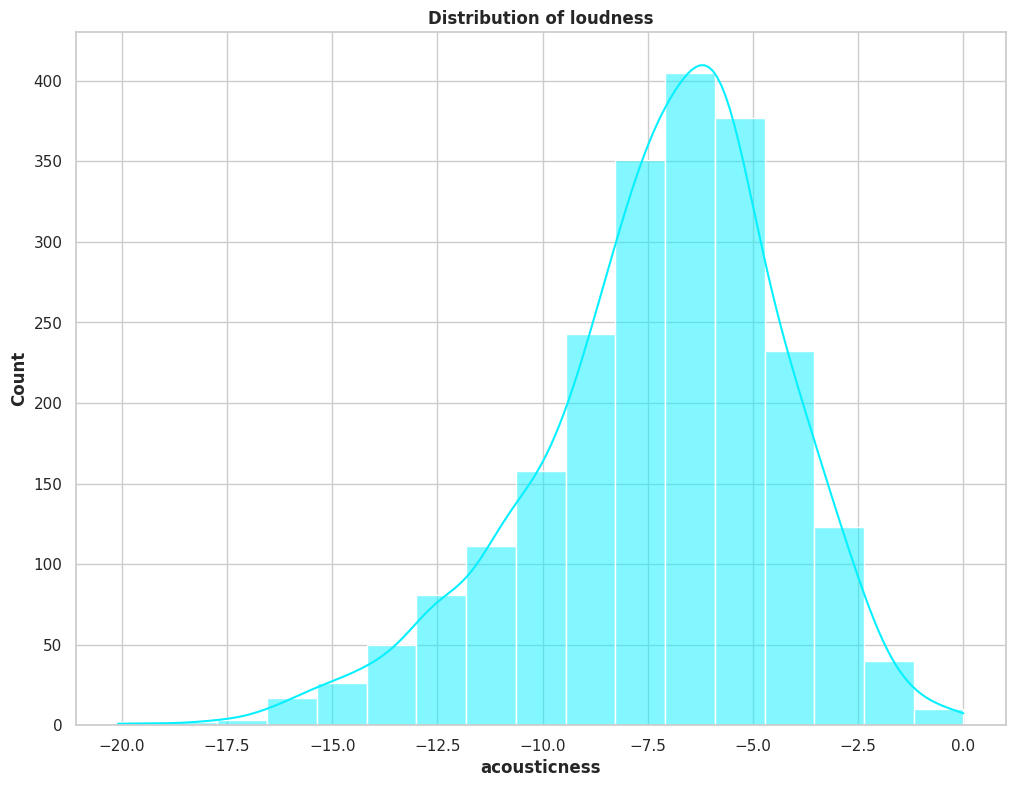

In [35]:
plt.figure(figsize=(12, 9))
ax = sns.histplot(df['loudness'], bins=17, kde=True, color='#06F0FF')

plt.title("Distribution of loudness", fontweight='bold')
plt.xlabel("acousticness", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()


In [36]:
top_singers_ = df['Singer'].value_counts().head(10)

In [37]:
top_singers_

Sunidhi Chauhan     100
Arijit Singh         84
Asha Bhosle          76
Badshah              65
Lata Mangeshwar      60
Vishal Dadlani       54
Mohammad Rafi        52
Shekhar Ravjiani     52
Atif aslam           51
Shaan                51
Name: Singer, dtype: int64

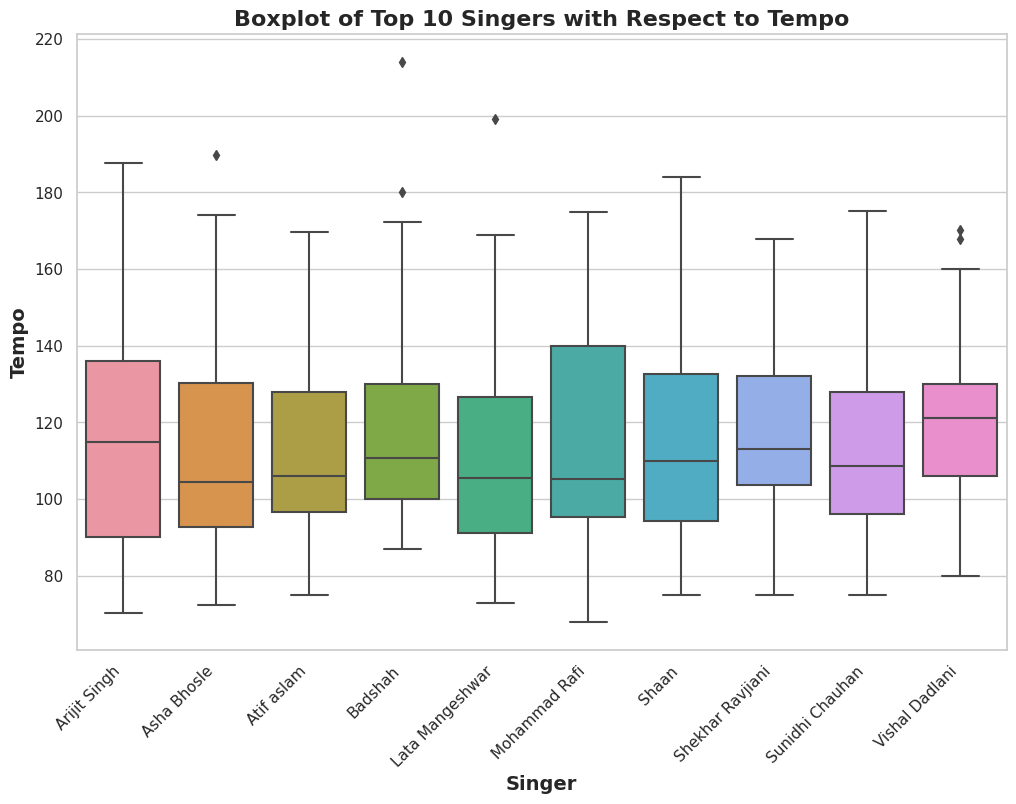

In [38]:
top_10_singers = df['Singer'].value_counts().nlargest(10).index
df_top_10 = df[df['Singer'].isin(top_10_singers)]

sns.set(style="whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
sns.boxplot(x='Singer', y='tempo', data=df_top_10)

plt.title('Boxplot of Top 10 Singers with Respect to Tempo', fontsize=16, fontweight='bold')
plt.xlabel('Singer', fontsize=14, fontweight='bold')
plt.ylabel('Tempo', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right')

plt.show()

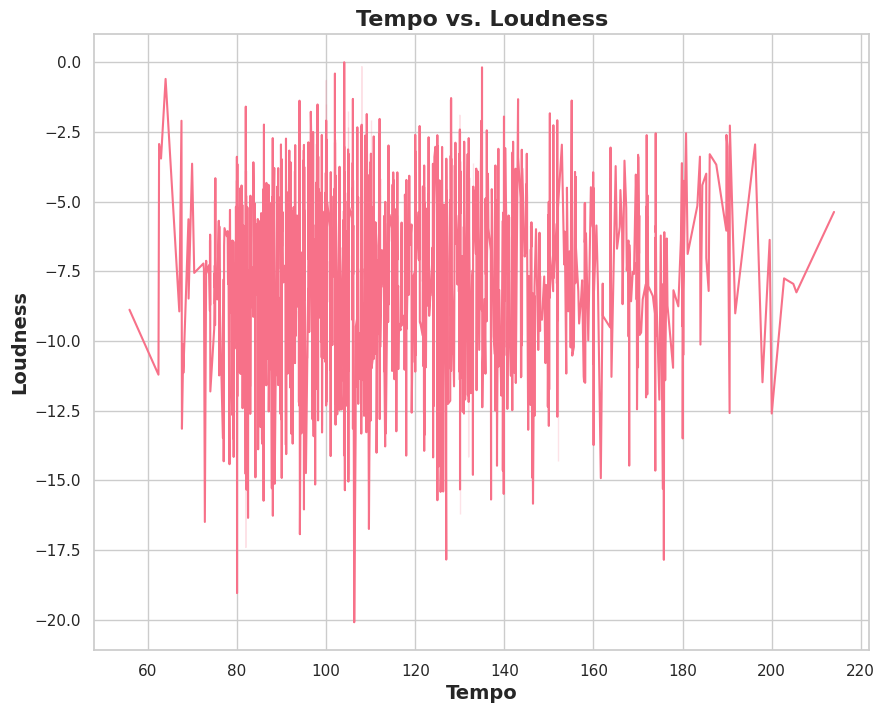

In [39]:
sns.set(style="whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(10, 8))
sns.lineplot(x='tempo', y='loudness', data=df)

plt.title('Tempo vs. Loudness', fontsize=16, fontweight='bold')
plt.xlabel('Tempo', fontsize=14, fontweight='bold')
plt.ylabel('Loudness', fontsize=14, fontweight='bold')

plt.show()

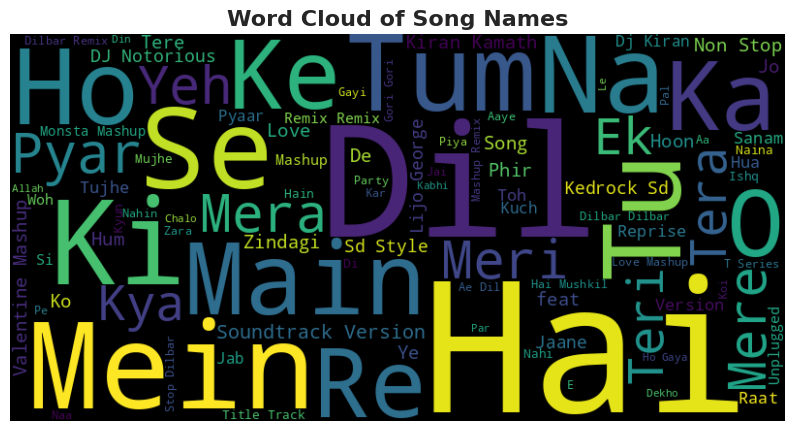

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(data, column_name, title, colormap):
    text = ' '.join(data[column_name].astype(str))

    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap=colormap, max_words=100).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()

generate_word_cloud(df, 'song_name', 'Word Cloud of Song Names', 'viridis')


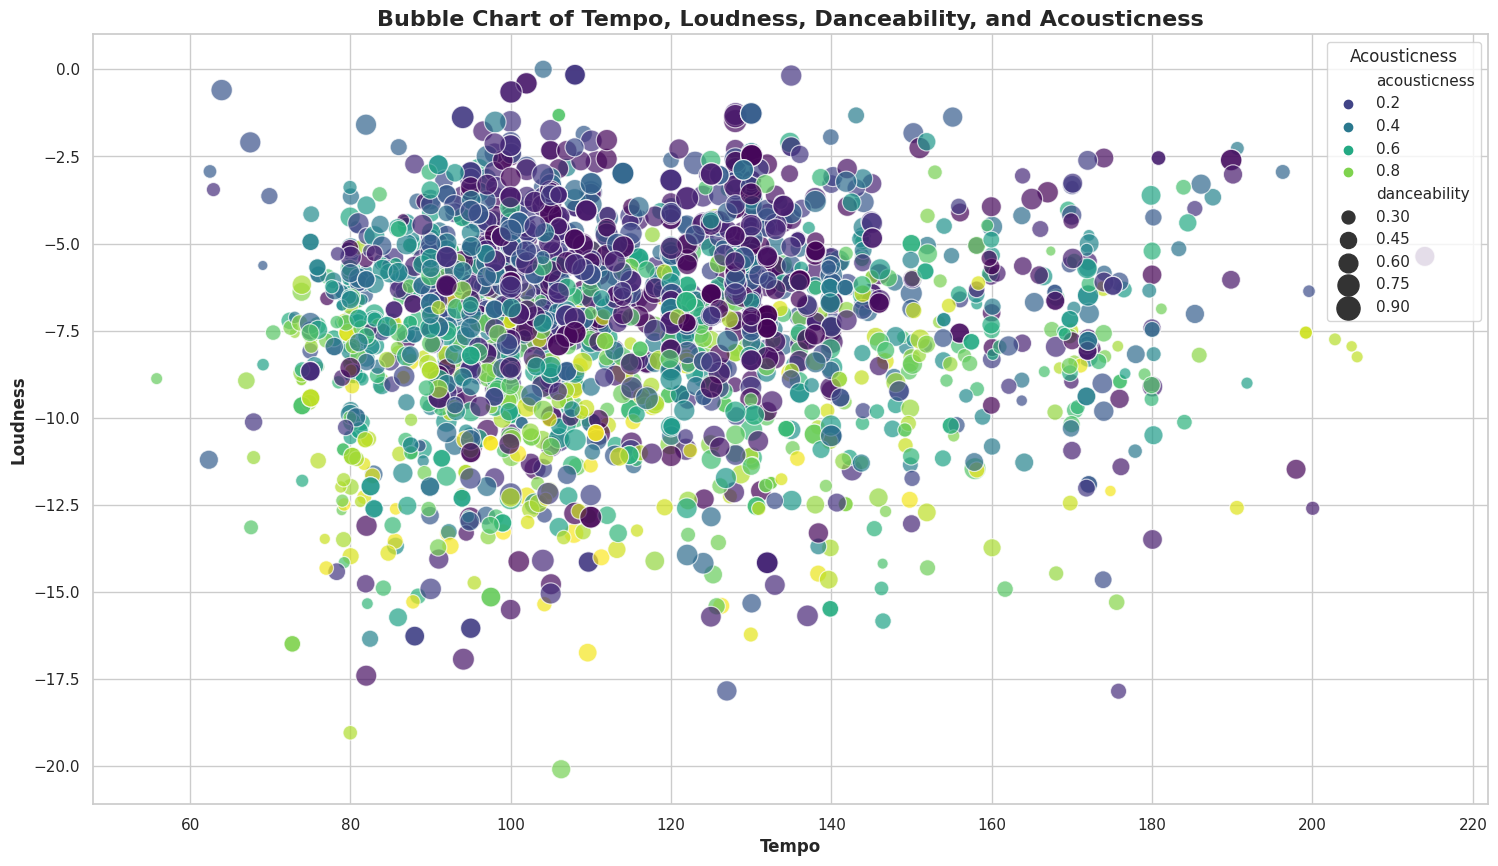

In [41]:
plt.figure(figsize=(18, 10))
sns.scatterplot(data=df, x='tempo', y='loudness', size='danceability', sizes=(40, 300), hue='acousticness', palette='viridis', alpha=0.7)
plt.title('Bubble Chart of Tempo, Loudness, Danceability, and Acousticness', fontsize=16, fontweight='bold')
plt.xlabel('Tempo', fontweight='bold' )
plt.ylabel('Loudness', fontweight='bold')
plt.legend(title='Acousticness', loc='upper right')
plt.show()

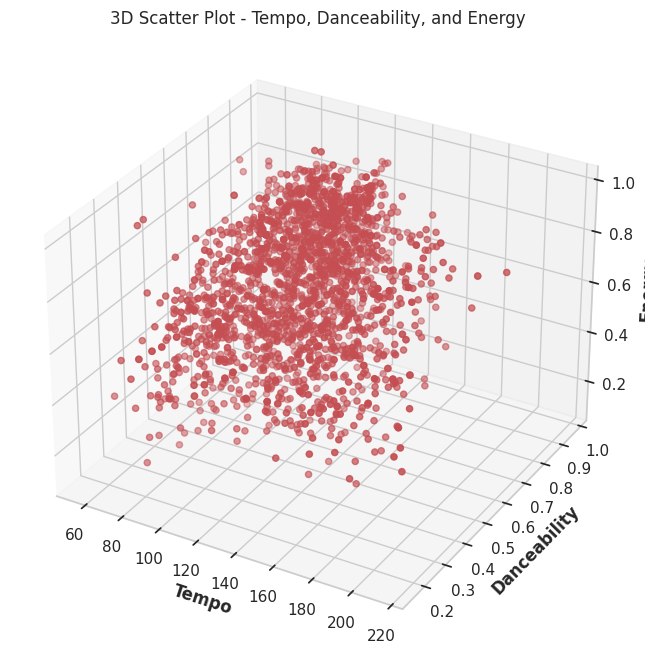

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

tempo = df["tempo"]
danceability = df["danceability"]
energy = df["energy"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tempo, danceability, energy, c='r', marker='o')

ax.set_xlabel('Tempo',  fontweight='bold')
ax.set_ylabel('Danceability',  fontweight='bold')
ax.set_zlabel('Energy',  fontweight='bold')

ax.set_title('3D Scatter Plot - Tempo, Danceability, and Energy')

plt.show()


# **ML Algorithim**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
features = ['tempo', 'loudness', 'acousticness']
target = 'danceability'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [45]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.015657304521763005
R-squared: 0.31509582287743676


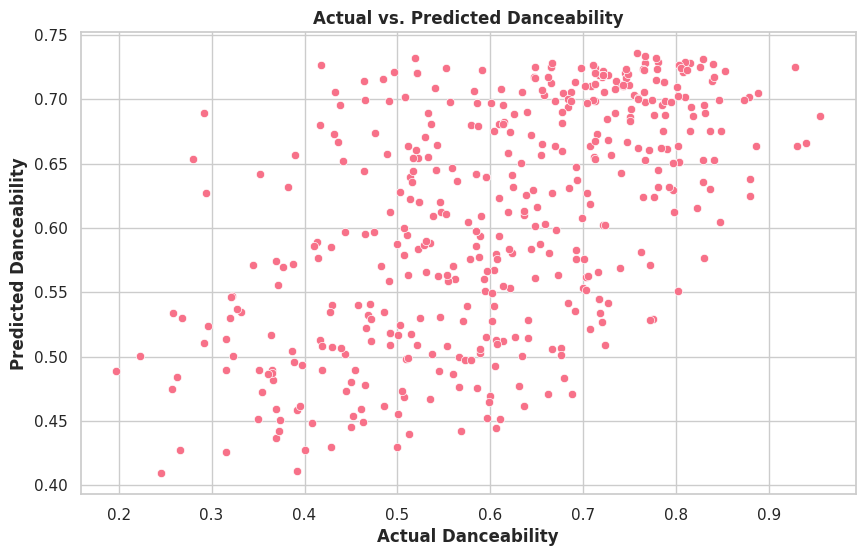

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Danceability', fontweight='bold')
plt.xlabel('Actual Danceability', fontweight='bold')
plt.ylabel('Predicted Danceability', fontweight='bold')
plt.show()
